# Project Description
> The data used in this project will help to identify whether a person is going to recover from coronavirus symptoms or not based on some pre-defined standard symptoms. These symptoms are based on guidelines given by the World Health Organization (WHO).
> This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.
The data is available from 22 Jan, 2020. Data is in “data.csv”.
The dataset contains 14 major variables that will be having an impact on whether someone has recovered or not, the description of each variable are as follows,
>>1. Country: where the person resides
2. Location: which part in the Country
3. Age: Classification of the age group for each person, based on WHO Age Group Standard
4. Gender: Male or Female
5. Visited_Wuhan: whether the person has visited Wuhan, China or not
6. From_Wuhan: whether the person is from Wuhan, China or not
7. Symptoms: there are six families of symptoms that are coded in six fields.
13. Time_before_symptoms_appear:
14. Result: death (1) or recovered (0)

> It is required to design different classifiers to the predict the outcome (death/recovered) when a new person is admitted to the hospital. The data is already cleaned and preprocessed.

# Steps to go through projct For all algorithms(KNN, SVM, DT, Naive Bayes)
1. Import the needed Libraries
2. Read the dataset(CSV File)
3. Dividing dataset into all features except the label(result)
4. Splite the data into Train and Test by 80% for training to 20% for testing
5. Normalize the data values using StandardScaler
6. GrideSearchCV to find the optimal hyperparameters by fit the model with difrrent hyperparameters and chose the best one    with high accuracy
7. Train the model with optimal hyperparameters
8. Test the accuracy of model on training set
9. Calculating classification Report (precision, recall, f1-score, accuracy) on test set
10. Calculating Area Under the Curve with predict probapility

# 1. Using Bernoulli Naive Bayes with Scikit-learn

In [1]:
#Import the needed Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, roc_auc_score

In [2]:
#Read the dataset(CSV File)
#df = pd.read_csv('data.csv',index_col= 0)  # we can use it to avoid the index (Unnamed: 0) column
df = pd.read_csv('data.csv')
df.head(5)

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [3]:
#Dividing dataset into all features except the label(result)
X = df.iloc[ : , 1 :-1]
Y = df['result'] # The class label
print(X.shape) , print(Y.shape)
X.head(5)

(863, 13)
(863,)


,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0


In [4]:
Y.head()

0    1
1    0
2    0
3    0
4    0
Name: result, dtype: int64

In [5]:
 Y.value_counts() #The class is highly imbalanced, with a ratio of 85%:15% for the majority to the minority class.

0    755
1    108
Name: result, dtype: int64

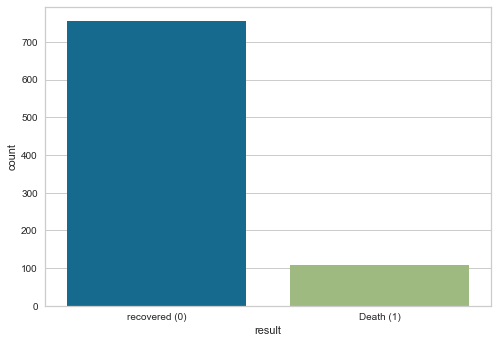

In [6]:
# plot the no of 1's and 0's
g = sns.countplot(df ['result'])
g.set_xticklabels(['recovered (0)', 'Death (1)']) 
plt.show()

## Synthetic Minority Oversampling Technique (SMOTE)
This technique generates synthetic data for the minority class.
SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

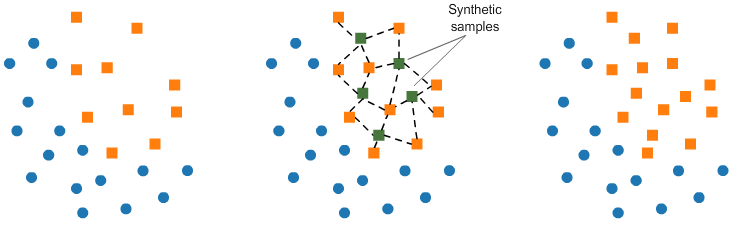

In [7]:
# load library
smote = SMOTE()
# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(X, Y)
print('Origianl dataset shape:', Counter(Y))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 755, 1: 108})
Resampple dataset shape: Counter({1: 755, 0: 755})


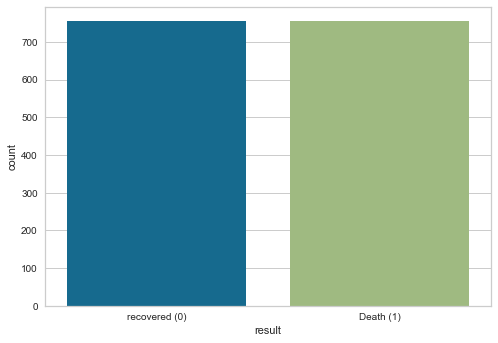

In [8]:
g = sns.countplot(y_smote)
g.set_xticklabels(['recovered (0)', 'Death (1)']) 
plt.show()

In [9]:
#Splite the data into Train and Test by 80% for training to 20% for testing
xTrain, xTest, yTrain, yTest = train_test_split(x_smote, y_smote, test_size = .2, random_state = 3, shuffle = True)
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(1208, 13)
(302, 13)
(1208,)
(302,)


In [10]:
#Normalize the data values using StandardScaler
scaler = StandardScaler()
scaler.fit(xTrain)
xTrain=scaler.transform(xTrain)
xTest=scaler.transform(xTest)

In [11]:
#GrideSearchCV to find the optimal hyperparameters by fit the model with difrrent hyperparameters and chose the best one with high accuracy
k_range = list(i*0.1 for i in range(1, 100))
clf = BernoulliNB(alpha = 1, binarize=1, fit_prior=True)
grid_values = {'alpha':k_range , 'binarize':k_range, 'fit_prior':[True, False]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,  cv= 10 , n_jobs= -1,scoring = 'accuracy')
grid_clf_acc.fit(xTrain, yTrain)

GridSearchCV(cv=10, estimator=BernoulliNB(alpha=1, binarize=1), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                                   0.6000000000000001, 0.7000000000000001, 0.8,
                                   0.9, 1.0, 1.1, 1.2000000000000002, 1.3,
                                   1.4000000000000001, 1.5, 1.6,
                                   1.7000000000000002, 1.8, 1.9000000000000001,
                                   2.0, 2.1, 2.2, 2.3000000000000003,
                                   2.4000000000000004, 2.5, 2.6, 2.7,
                                   2.800000000000...],
                         'binarize': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                                      0.6000000000000001, 0.7000000000000001,
                                      0.8, 0.9, 1.0, 1.1, 1.2000000000000002,
                                      1.3, 1.4000000000000001, 1.5, 1.6,
                                      1.700000

In [12]:
print(grid_clf_acc.best_score_)
print(grid_clf_acc.best_params_)
print(grid_clf_acc.best_estimator_)

0.8658815426997245
{'alpha': 0.1, 'binarize': 0.1, 'fit_prior': False}
BernoulliNB(alpha=0.1, binarize=0.1, fit_prior=False)


In [13]:
#Train the model with optimal hyperparameters
model = BernoulliNB(alpha = 0.1, binarize=0.1, fit_prior = False)
model.fit(xTrain,yTrain)

BernoulliNB(alpha=0.1, binarize=0.1, fit_prior=False)

In [14]:
#Test the accuracy of model on training set
print('BernoulliNB Model Train Score is : ' , model.score(xTrain, yTrain))

BernoulliNB Model Train Score is :  0.8658940397350994


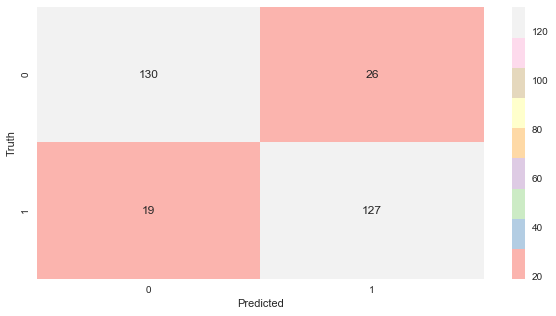

In [15]:
#Calculating Prediction
yPred = model.predict(xTest)
CM = confusion_matrix(yTest, yPred)
plt.figure(figsize=(10,5))
sns.heatmap(CM, annot=True, fmt='g', cmap='Pastel1');
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.legend('confusion Matrix')

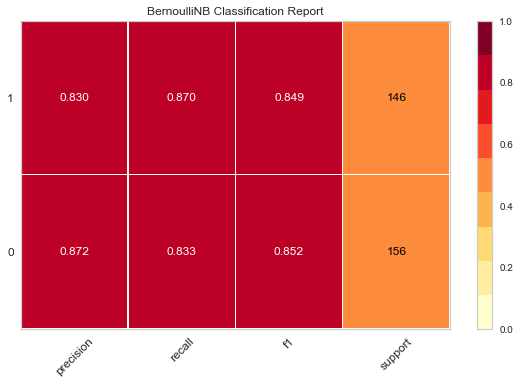

In [16]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set  
classes = ['0' , '1']
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(xTrain, yTrain)        # Fit the visualizer and the model
visualizer.score(xTest, yTest)        # Evaluate the model on the test data
visualizer.show()                     # Finalize and show the figure

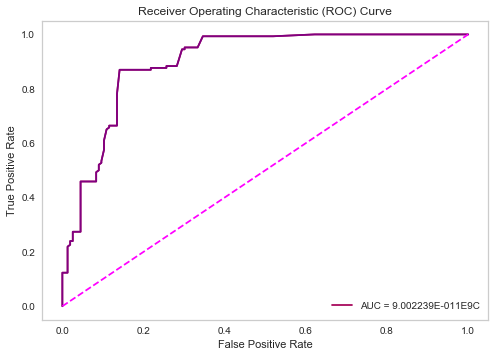

In [17]:
#Calculating Area Under the Curve with predict probapility
fpr, tpr, thresholds = roc_curve(yTest, model.predict_proba(xTest)[:,1])
roc_auc = roc_auc_score(yTest, model.predict_proba(xTest)[:,1])
plt.plot(fpr, tpr, 'm', label = 'AUC = %7E1E9C' % roc_auc)
plt.plot(fpr, tpr, color='purple', label='')
plt.plot([0, 1], [0, 1], color='magenta', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()

# 2. Using Support vector machine (SVM) with Scikit-learn

### The rest algorithms have the same five steps 
1. Import the needed Libraries
2. Read the dataset(CSV File)
3. Dividing dataset into all features except the label(result)
4. Splite the data into Train and Test by 80% for training to 20% for testing
5. Normalize the data values using StandardScaler

In [18]:
from sklearn.svm import SVC

In [19]:
#GrideSearchCV to find the optimal hyperparameters by fit the model with difrrent hyperparameters and chose the best one with high accuracy
get_grid_para = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf'], 'probability':[True,False]}
grid_result = GridSearchCV(SVC(random_state=3), get_grid_para, refit = True, verbose = 3, cv= 10, n_jobs= -1, scoring = 'accuracy') 
grid_result.fit(xTrain, yTrain)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=10, estimator=SVC(random_state=3), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf'],
                         'probability': [True, False]},
             scoring='accuracy', verbose=3)

In [20]:
print(grid_result.best_params_, '  ' , grid_result.best_estimator_ , ' The Best Score : ' , grid_result.best_score_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}    SVC(C=100, gamma=0.1, probability=True, random_state=3)  The Best Score :  0.9768181818181818


In [21]:
#Train the model with optimal hyperparameters
SVM_model = SVC( kernel = 'rbf', C=10 , gamma=0.1 , random_state = 0 , probability=True)
SVM_model.fit(xTrain, yTrain)

SVC(C=10, gamma=0.1, probability=True, random_state=0)

In [22]:
#Test the accuracy of model on training set
print('SVM_model Train Score is : ' , SVM_model.score(xTrain, yTrain))

SVM_model Train Score is :  0.9908940397350994


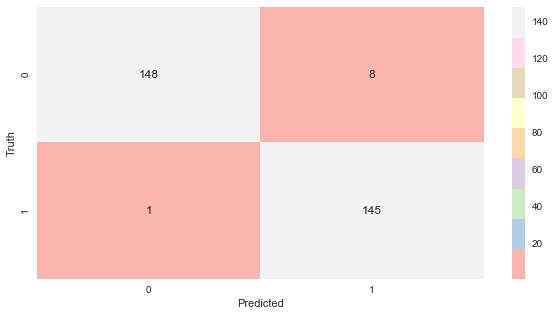

In [23]:
#Calculating Prediction
yPred = SVM_model.predict(xTest)
CM = confusion_matrix(yTest, yPred)
plt.figure(figsize=(10,5))
sns.heatmap(CM, annot=True, fmt='g', cmap='Pastel1');
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.legend('confusion Matrix')

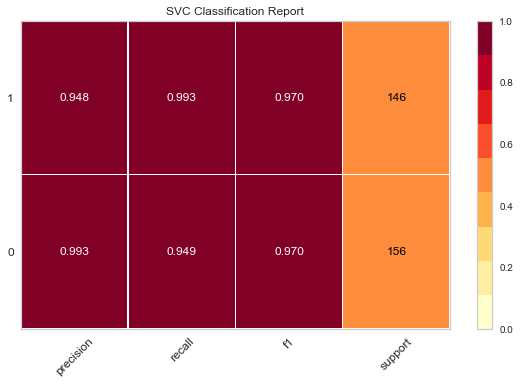

In [24]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set  
classes = ['0' , '1']
visualizer = ClassificationReport(SVM_model, classes=classes, support=True)

visualizer.fit(xTrain, yTrain)        # Fit the visualizer and the model
visualizer.score(xTest, yTest)        # Evaluate the model on the test data
visualizer.show()                     # Finalize and show the figure

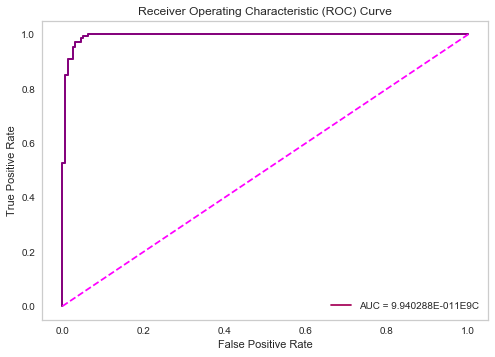

In [25]:
#Calculating Area Under the Curve with predict probapility
fpr, tpr, thresholds = roc_curve(yTest, SVM_model.predict_proba(xTest)[:,1])
roc_auc = roc_auc_score(yTest, SVM_model.predict_proba(xTest)[:,1])
plt.plot(fpr, tpr, 'm', label = 'AUC = %7E1E9C' % roc_auc)
plt.plot(fpr, tpr, color='purple', label='')
plt.plot([0, 1], [0, 1], color='magenta', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()

# 3. Using DecisionTree with Scikit-learn

### Have the same first 5 steps 
1. Import the needed Libraries
2. Read the dataset(CSV File)
3. Dividing dataset into all features except the label(result)
4. Splite the data into Train and Test by 80% for training to 20% for testing
5. Normalize the data values using StandardScaler

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
D_Tree_model = DecisionTreeClassifier(random_state=3)

In [28]:
#GrideSearchCV to find the optimal hyperparameters by fit the model with difrrent hyperparameters and chose the best one with high accuracy
k_range = list(i for i in range(1, 20))
get_grid_para = {"criterion" : ["gini" , "entropy"], "max_depth" : k_range, "min_samples_leaf": k_range}
grid_result = GridSearchCV(D_Tree_model , param_grid= get_grid_para , cv= 10, n_jobs= -1, scoring = 'accuracy')
grid_result.fit(xTrain, yTrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [29]:
print(grid_result.best_params_, '  \n' , grid_result.best_estimator_ , '\n The Best Score : ' , grid_result.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}   
 DecisionTreeClassifier(max_depth=10, random_state=3) 
 The Best Score :  0.9735192837465565


In [30]:
#Train the model with optimal hyperparameters
D_Tree = DecisionTreeClassifier(criterion= "gini", max_depth= 7, min_samples_leaf= 1 , random_state= 3)
D_Tree.fit(xTrain , yTrain)

DecisionTreeClassifier(max_depth=7, random_state=3)

In [31]:
#Test the accuracy of model on training set
print('D_Tree Train Score is : ' , D_Tree.score(xTrain, yTrain))

D_Tree Train Score is :  0.9884105960264901


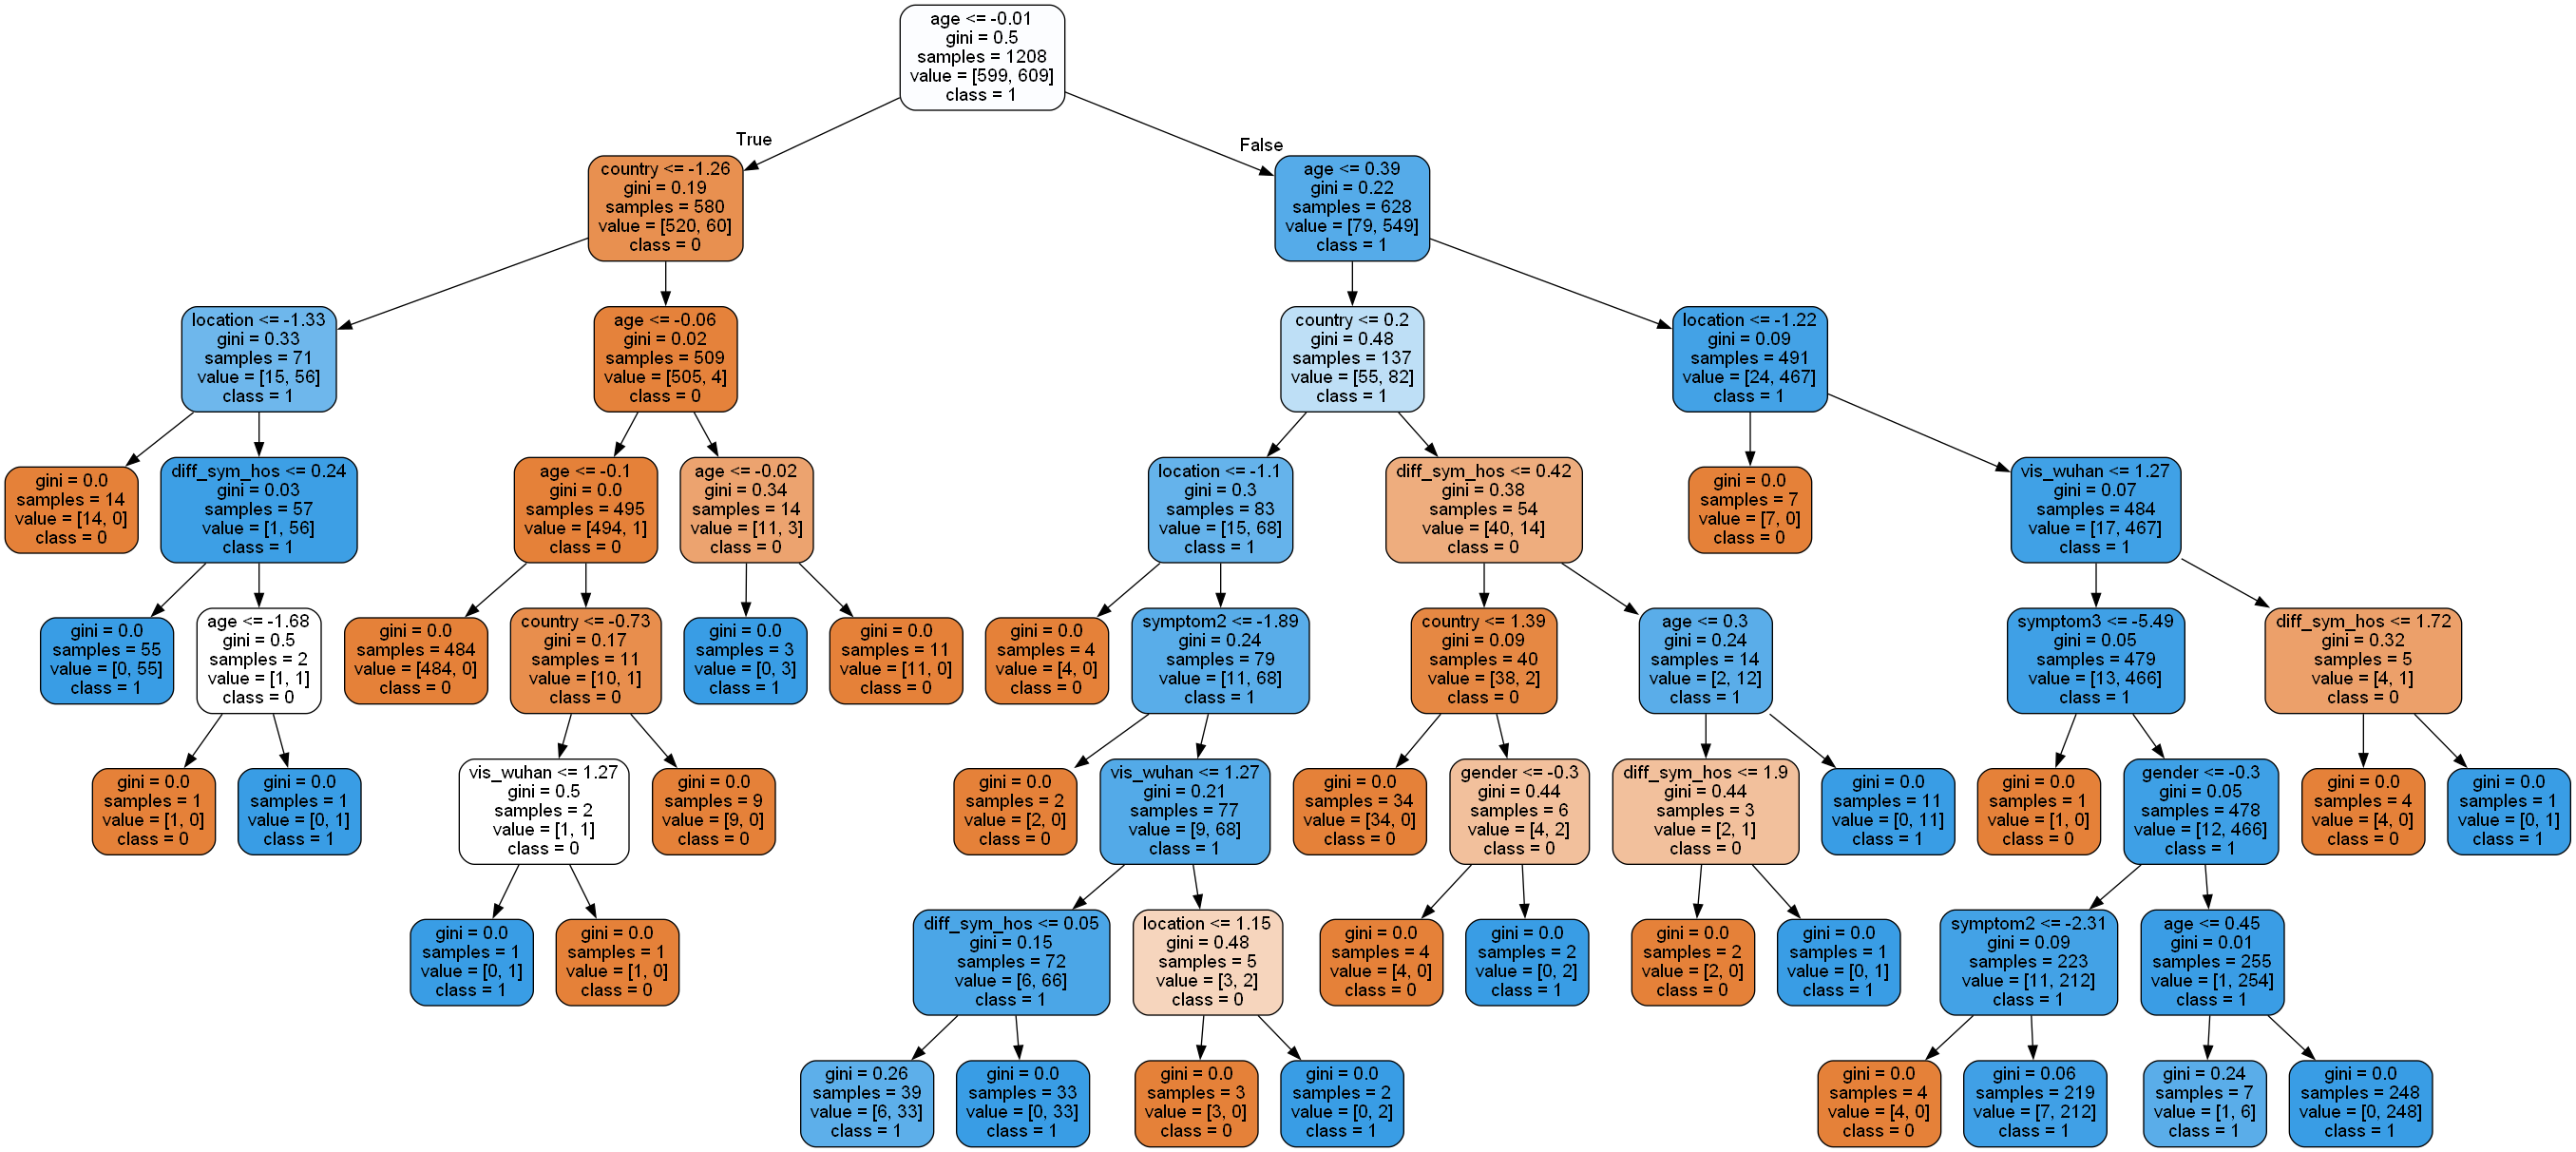

In [32]:
#Make an Visualization of the Decision Tree
import os 
import pydotplus
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

os.environ["PATH"] += os.pathsep + 'C://Anaconda//pkgs//Graphviz//bin'

dot_data = StringIO()
feature_cols = X.columns
export_graphviz(D_Tree, out_file= dot_data, feature_names = feature_cols, class_names = ["0", "1"], rounded = True, proportion = False, precision = 2, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Decision Tree.png")
Image(graph.create_png())

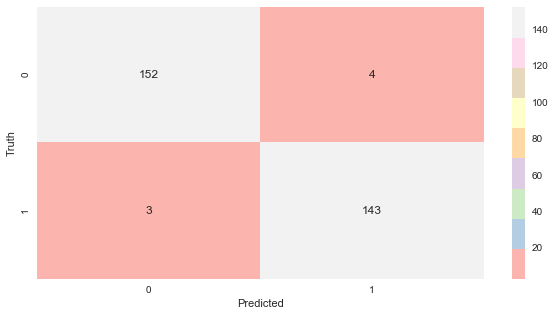

In [33]:
#Calculating Prediction
yPred = D_Tree.predict(xTest)
CM = confusion_matrix(yTest, yPred)
plt.figure(figsize=(10,5))
sns.heatmap(CM, annot=True, fmt='g', cmap='Pastel1');
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.legend('confusion Matrix')

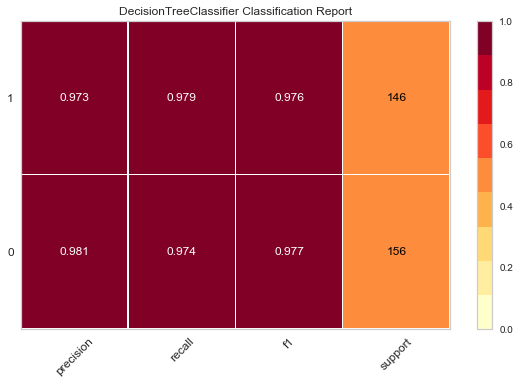

In [34]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set  
classes = ['0' , '1']
visualizer = ClassificationReport(D_Tree, classes=classes, support=True)
visualizer.fit(xTrain, yTrain)        # Fit the visualizer and the model
visualizer.score(xTest, yTest)        # Evaluate the model on the test data
visualizer.show()                     # Finalize and show the figure

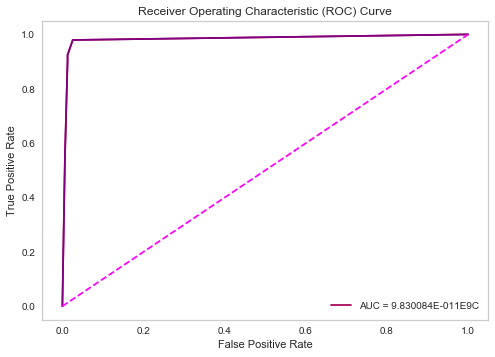

In [35]:
#Calculating Area Under the Curve with predict probapility
fpr, tpr, thresholds = roc_curve(yTest, D_Tree.predict_proba(xTest)[:,1])
roc_auc = roc_auc_score(yTest, D_Tree.predict_proba(xTest)[:,1])
plt.plot(fpr, tpr, 'm', label = 'AUC = %7E1E9C' % roc_auc)
plt.plot(fpr, tpr, color='purple', label='')
plt.plot([0, 1], [0, 1], color='magenta', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()

# 4. Using K-Nearest Neighbour(KNN) with Scikit-learn

### Have the same first 5 steps 
1. Import the needed Libraries
2. Read the dataset(CSV File)
3. Dividing dataset into all features except the label(result)
4. Splite the data into Train and Test by 80% for training to 20% for testing
5. Normalize the data values using StandardScaler

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
initial_n_neighbors_value = np.random.randint(1 , 15)
classifier = KNeighborsClassifier(n_neighbors = initial_n_neighbors_value, metric = 'minkowski', p = 2)

In [38]:
#GrideSearchCV to find the optimal hyperparameters by fit the model with difrrent hyperparameters and chose the best one with high accuracy
k_range = list(range(1, 15))
param_grid = {'n_neighbors': k_range, 'weights': ['uniform', 'distance']}
grid = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy')
grid.fit(xTrain, yTrain)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=8),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [39]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9536225895316806
{'n_neighbors': 1, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=1)


In [40]:
#Train the model with optimal hyperparameters
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2, weights='distance')
knn.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [41]:
#Test the accuracy of model on training set
print('KNN Model Train Score is : ' , knn.score(xTrain, yTrain))

KNN Model Train Score is :  1.0


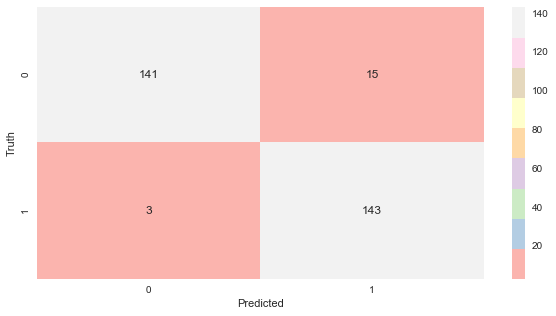

In [42]:
#Calculating Prediction
yPred = knn.predict(xTest)
CM = confusion_matrix(yTest, yPred)
plt.figure(figsize=(10,5))
sns.heatmap(CM, annot=True, fmt='g', cmap='Pastel1');
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.legend('confusion Matrix')

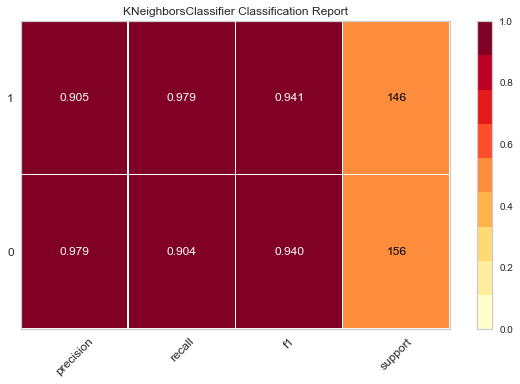

In [43]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set  
classes = ['0' , '1']
visualizer = ClassificationReport(knn, classes=classes, support=True)
visualizer.fit(xTrain, yTrain)        # Fit the visualizer and the model
visualizer.score(xTest, yTest)        # Evaluate the model on the test data
visualizer.show()                     # Finalize and show the figure

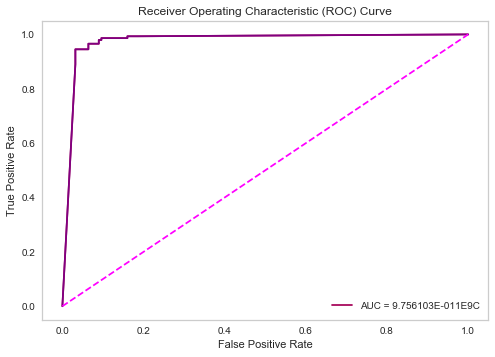

In [44]:
#Calculating Area Under the Curve with predict probapility
fpr, tpr, thresholds = roc_curve(yTest, knn.predict_proba(xTest)[:,1])
roc_auc = roc_auc_score(yTest, knn.predict_proba(xTest)[:,1])
plt.plot(fpr, tpr, 'm', label = 'AUC = %7E1E9C' % roc_auc)
plt.plot(fpr, tpr, color='purple', label='')
plt.plot([0, 1], [0, 1], color='magenta', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()

# 5. Using LogisticRegression(LogReg) with Scikit-learn

### Have the same first 5 steps 
1. Import the needed Libraries
2. Read the dataset(CSV File)
3. Dividing dataset into all features except the label(result)
4. Splite the data into Train and Test by 80% for training to 20% for testing
5. Normalize the data values using StandardScaler

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
clf = LogisticRegression()
grid_values = {'C':[0.001,.005,0.08,0.1,0.5,0.8,1.2,1,5,10,25, 1e5], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,  cv= 10 , n_jobs= -1,scoring = 'accuracy')
grid_clf_acc.fit(xTrain, yTrain)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.005, 0.08, 0.1, 0.5, 0.8, 1.2, 1, 5, 10,
                               25, 100000.0],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [47]:
print(grid_clf_acc.best_score_)
print(grid_clf_acc.best_params_)
print(grid_clf_acc.best_estimator_)

0.9171831955922866
{'C': 5, 'solver': 'newton-cg'}
LogisticRegression(C=5, solver='newton-cg')


In [48]:
#Train the model with optimal hyperparameters
LogisticRegressionModel = LogisticRegression(solver = 'newton-cg', C = 5, random_state=1, max_iter = 500)
LogisticRegressionModel.fit(xTrain, yTrain)

LogisticRegression(C=5, max_iter=500, random_state=1, solver='newton-cg')

In [49]:
#Test the accuracy of model on training set
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(xTrain, yTrain))

LogisticRegressionModel Train Score is :  0.9197019867549668


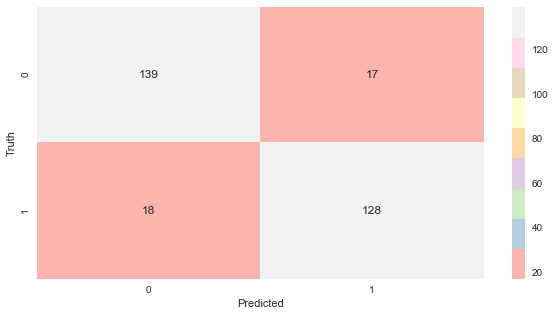

In [50]:
#Calculating Prediction
yPred = LogisticRegressionModel.predict(xTest)
CM = confusion_matrix(yTest, yPred)
plt.figure(figsize=(10,5))
sns.heatmap(CM, annot=True, fmt='g', cmap='Pastel1');
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.legend('confusion Matrix')          

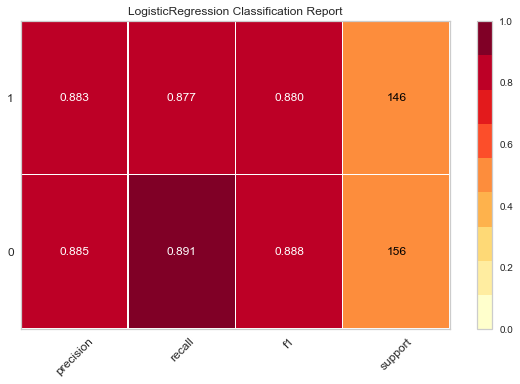

In [51]:
from yellowbrick.classifier import ClassificationReport
classes = ['0' , '1']
visualizer = ClassificationReport(LogisticRegressionModel, classes=classes, support=True)
visualizer.fit(xTrain, yTrain)        # Fit the visualizer and the model
visualizer.score(xTest, yTest)        # Evaluate the model on the test data
visualizer.show()                     # Finalize and show the figure

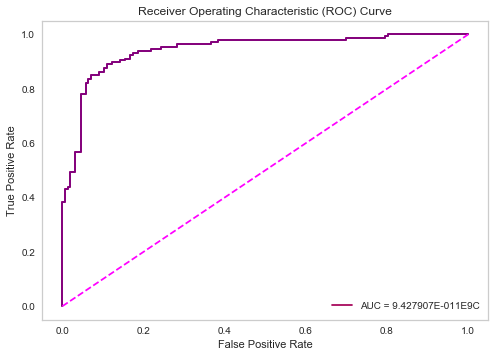

In [52]:
#Calculating Area Under the Curve with predict probapility
fpr, tpr, thresholds = roc_curve(yTest, LogisticRegressionModel.predict_proba(xTest)[:,1])
roc_auc = roc_auc_score(yTest, LogisticRegressionModel.predict_proba(xTest)[:,1])
plt.plot(fpr, tpr, 'm', label = 'AUC = %7E1E9C' % roc_auc)
plt.plot(fpr, tpr, color='purple', label='')
plt.plot([0, 1], [0, 1], color='magenta', linestyle='--')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')

## Thank You 